In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import special

## Part b, plotting intensity with fraunhofer approximation

In [2]:
x = np.linspace(-0.05,0.05,1000)
y = np.linspace(-0.5,0.5,1000)

X, Y = np.meshgrid(x, y)


In [3]:
def I_x(x): 
    return np.sinc(200/np.pi * x)**2

def I_y_sinc(y): 
    return np.sinc(20/np.pi * y)**2 
def I_y_cos(y):
    return np.cos(100*y)**2

def I_xy(x,y): 
    return np.sinc(200/np.pi * x)**2 * np.sinc(20/np.pi * y)**2 * np.cos(100*y)**2

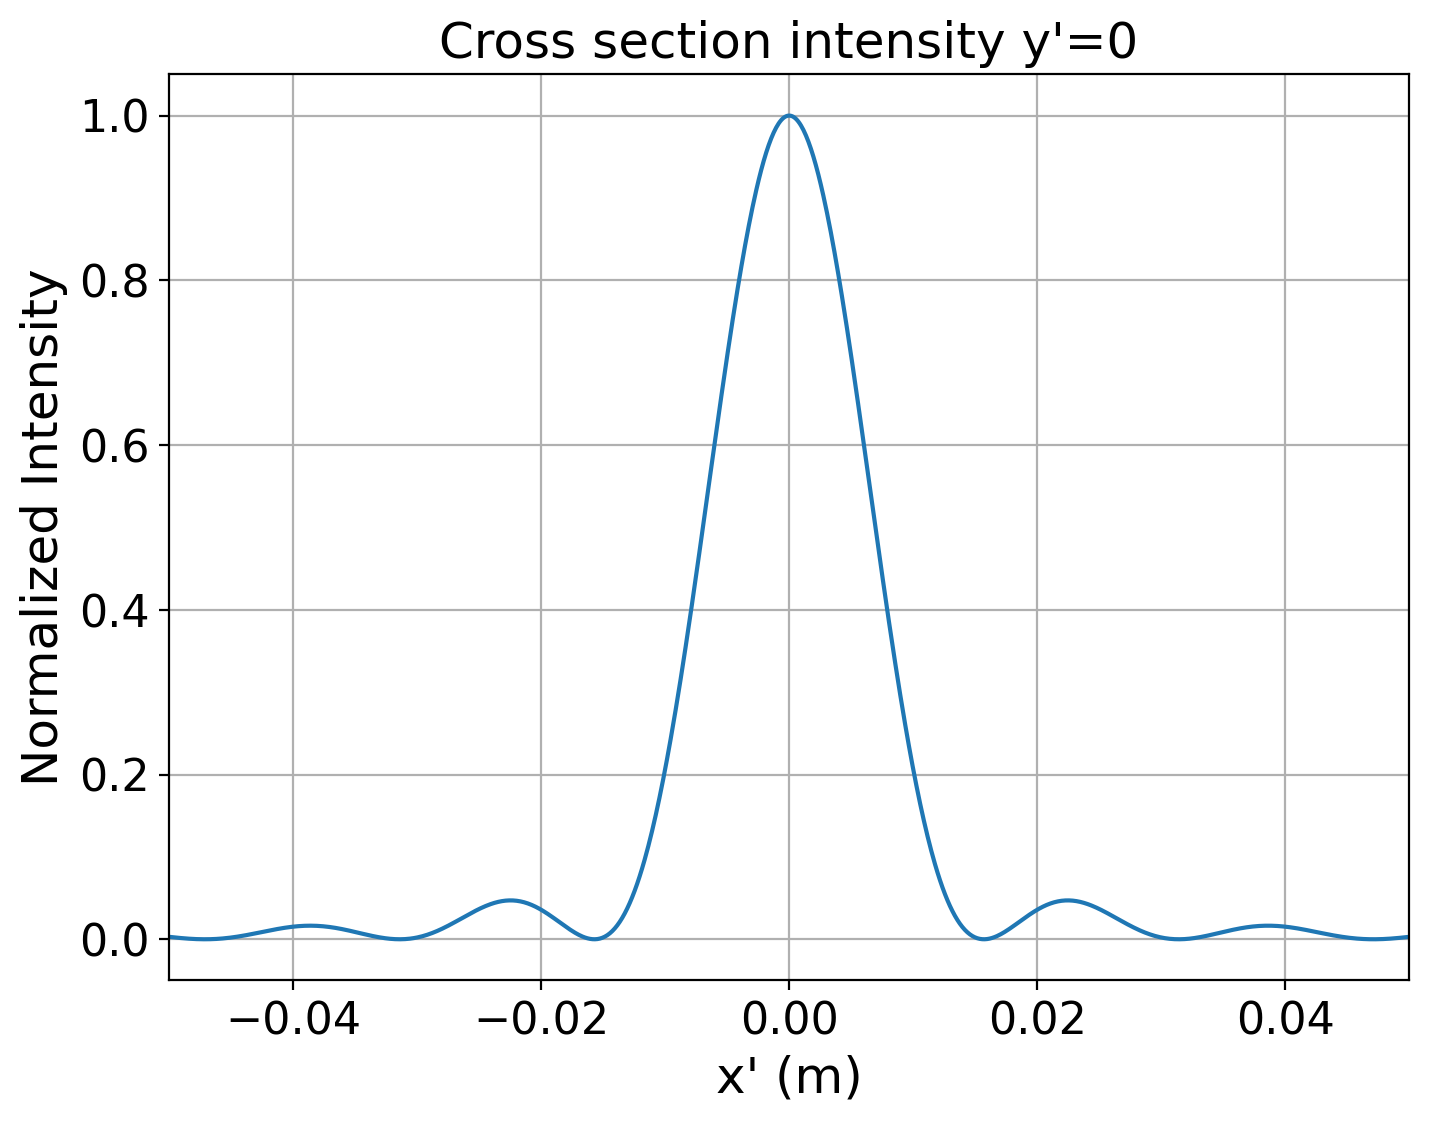

In [4]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, I_x(x))
plt.grid()
plt.xlim(-0.05,0.05)
plt.title('Cross section intensity y\'=0', fontsize=18)
plt.xlabel('x\' (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.savefig('hw2_q1b_xCS.png', dpi=200)

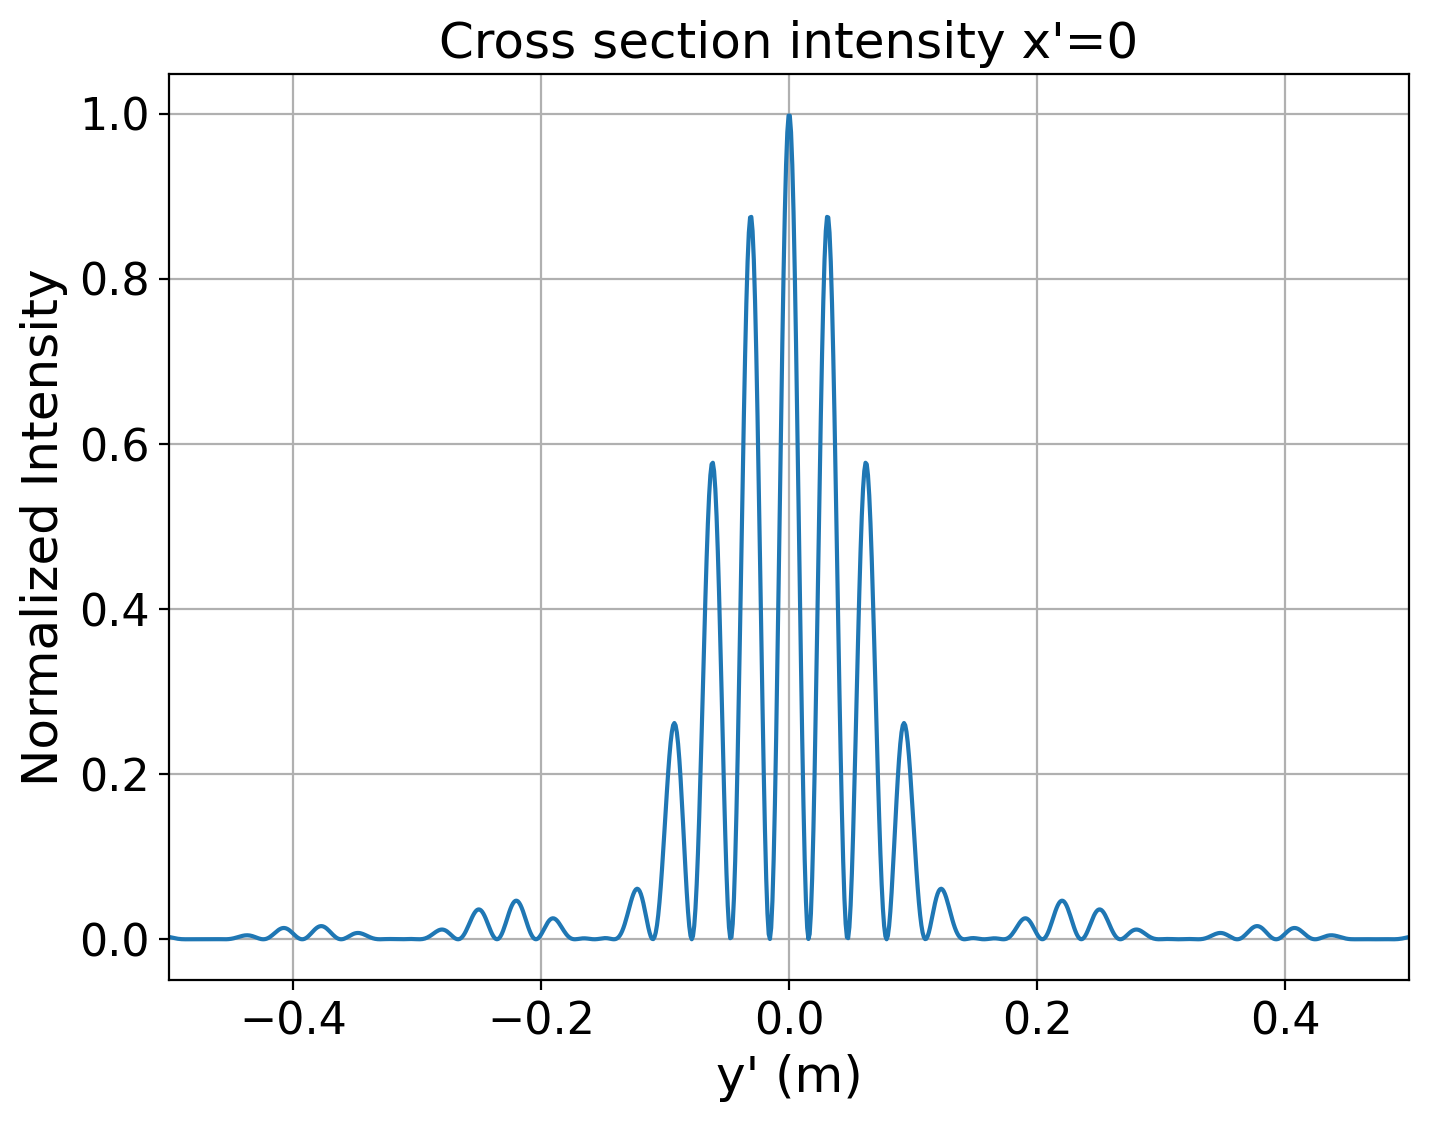

In [5]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(y, I_y_cos(y)*I_y_sinc(y))
plt.grid()
plt.xlim(-0.5,0.5)
plt.title('Cross section intensity x\'=0', fontsize=18)
plt.xlabel('y\' (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.savefig('hw2_q1b_yCS.png', dpi=200)

Text(0.5, 1.0, 'Normalized intensity at observation plane')

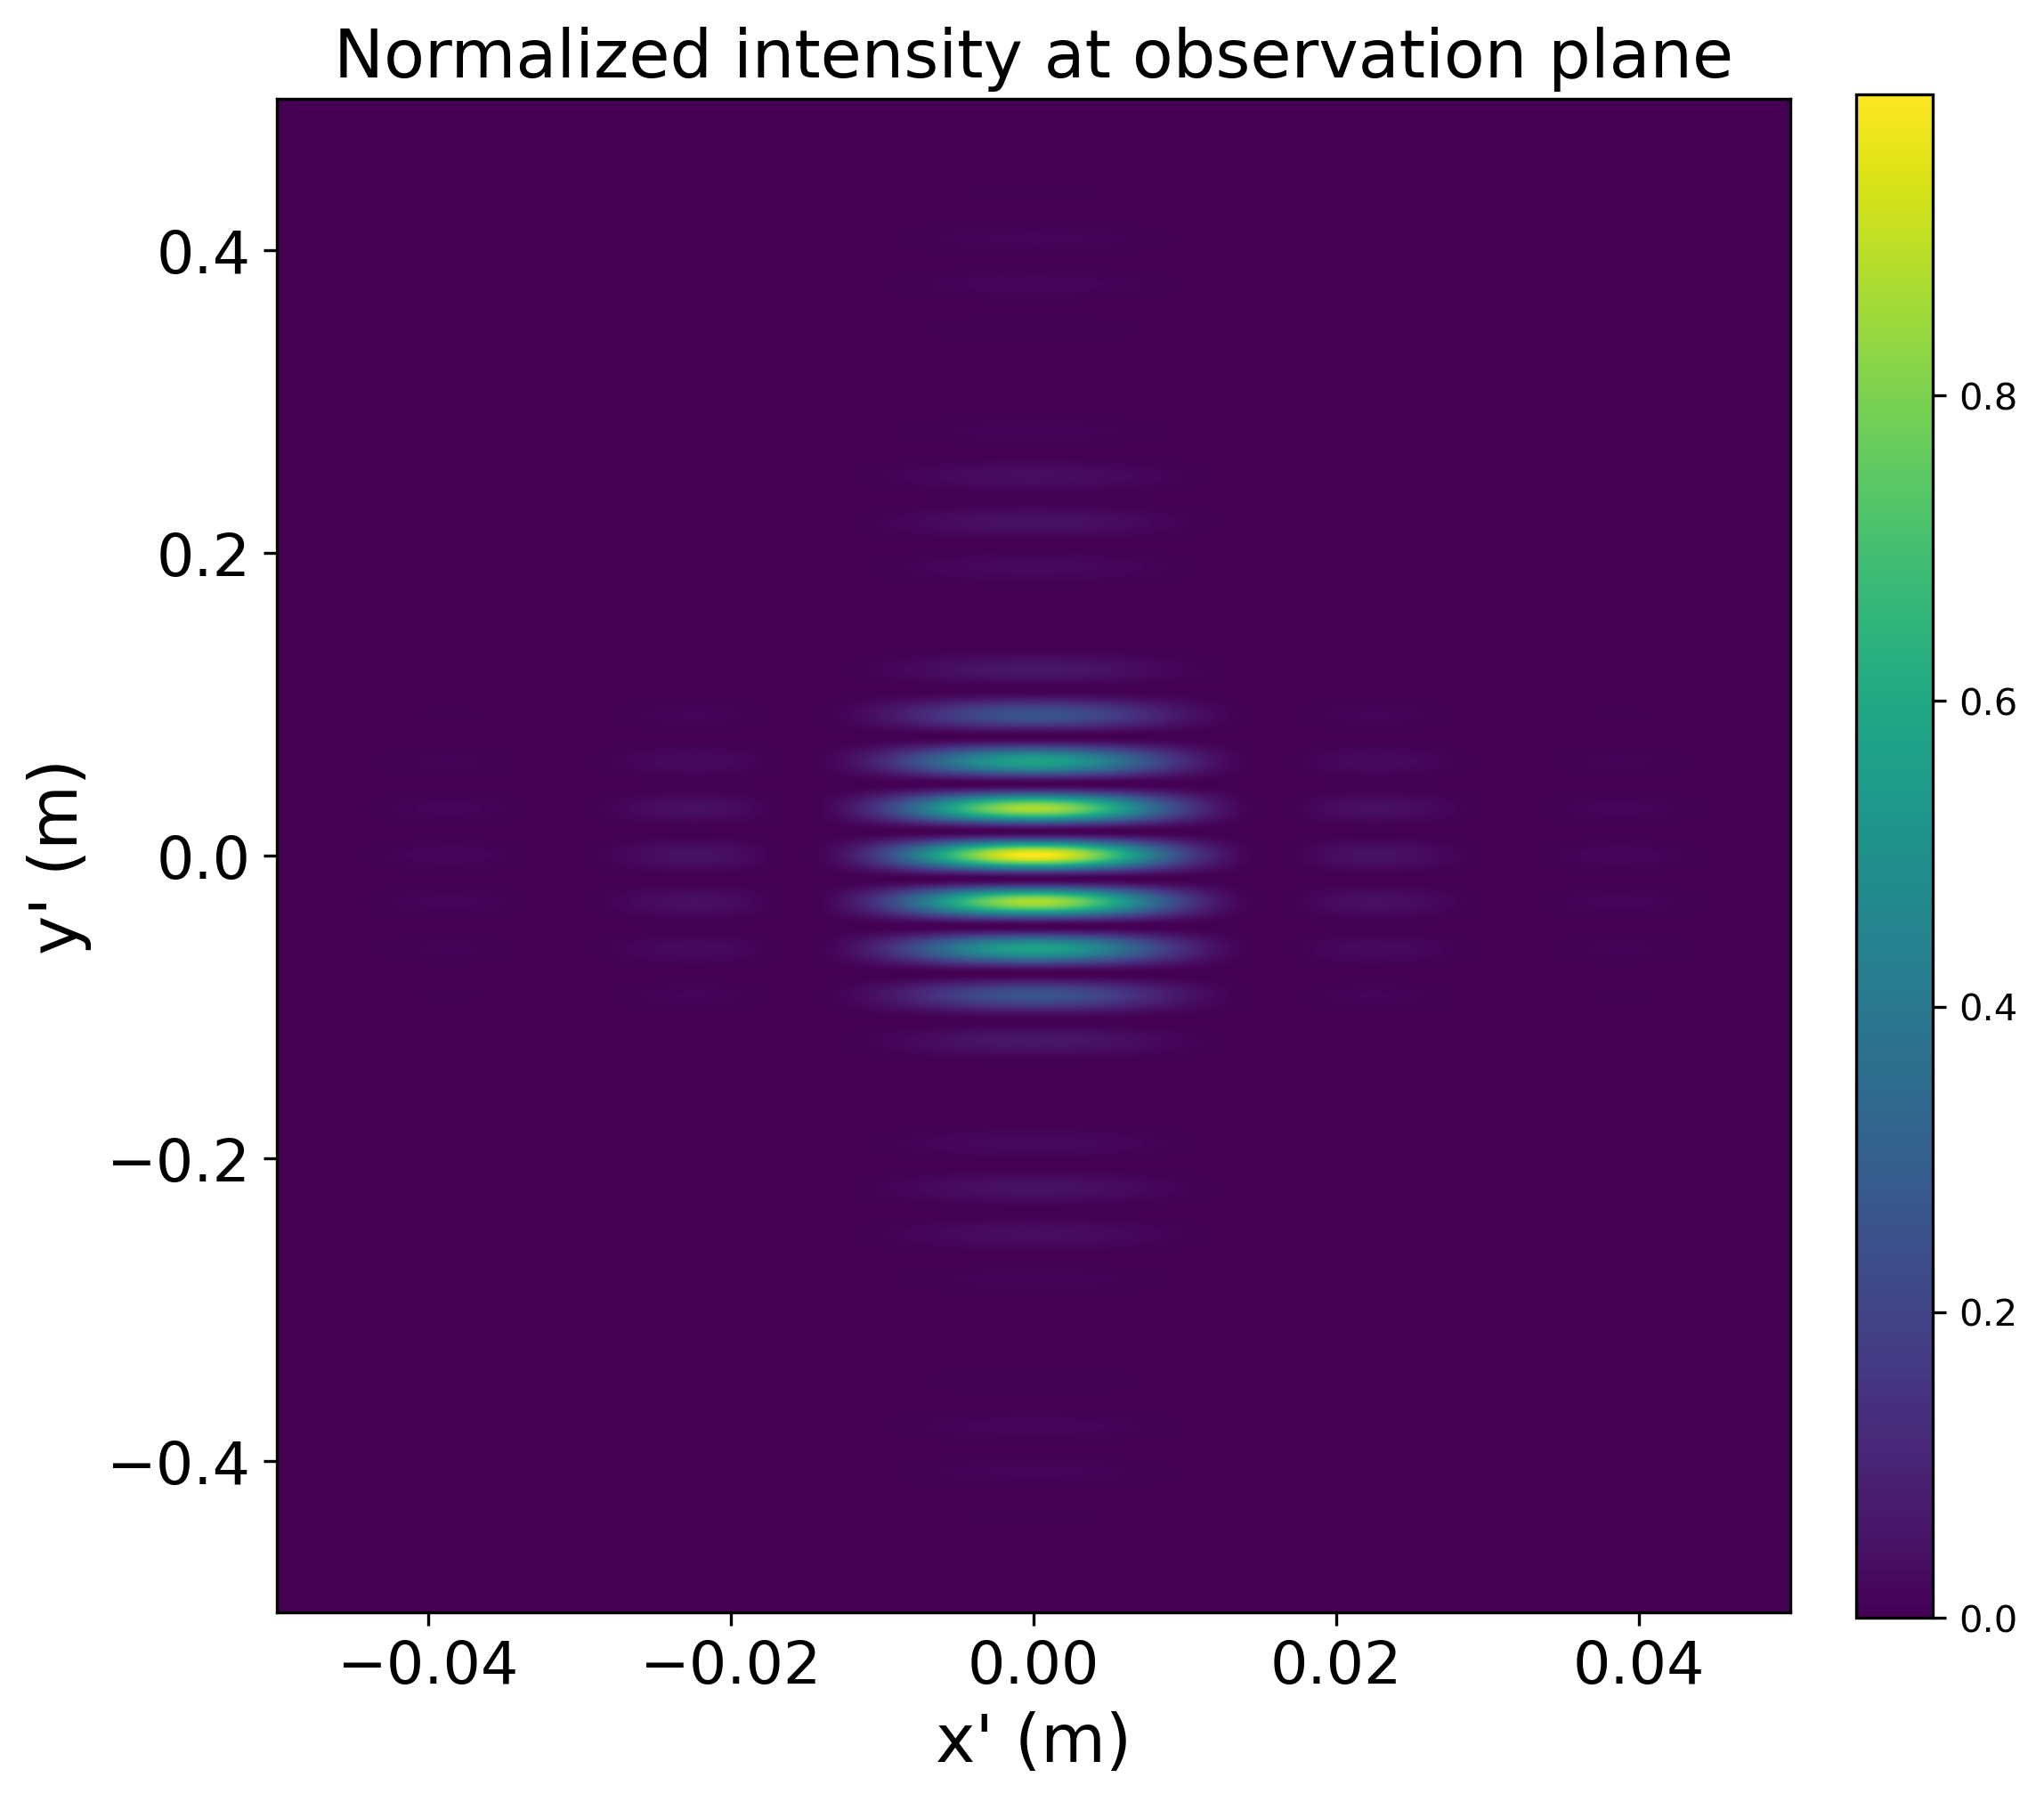

In [6]:
plt.figure(figsize=(8, 8), dpi=300)
Z = I_xy(X, Y)
plt.imshow(Z, extent=[-0.05, 0.05, -0.5, 0.5], origin='lower',
           cmap='viridis', aspect=0.1)
plt.colorbar(fraction=0.046, pad=0.04)
plt.xlabel('x\' (m)', fontsize=18)
plt.ylabel('y\' (m)', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.title('Normalized intensity at observation plane',fontsize=18)
#plt.savefig('hw2_q1b_xycolormap.png', dpi=300)

## Part D (bonus), results from evaluating Fresnel integral and plotting with erfi function

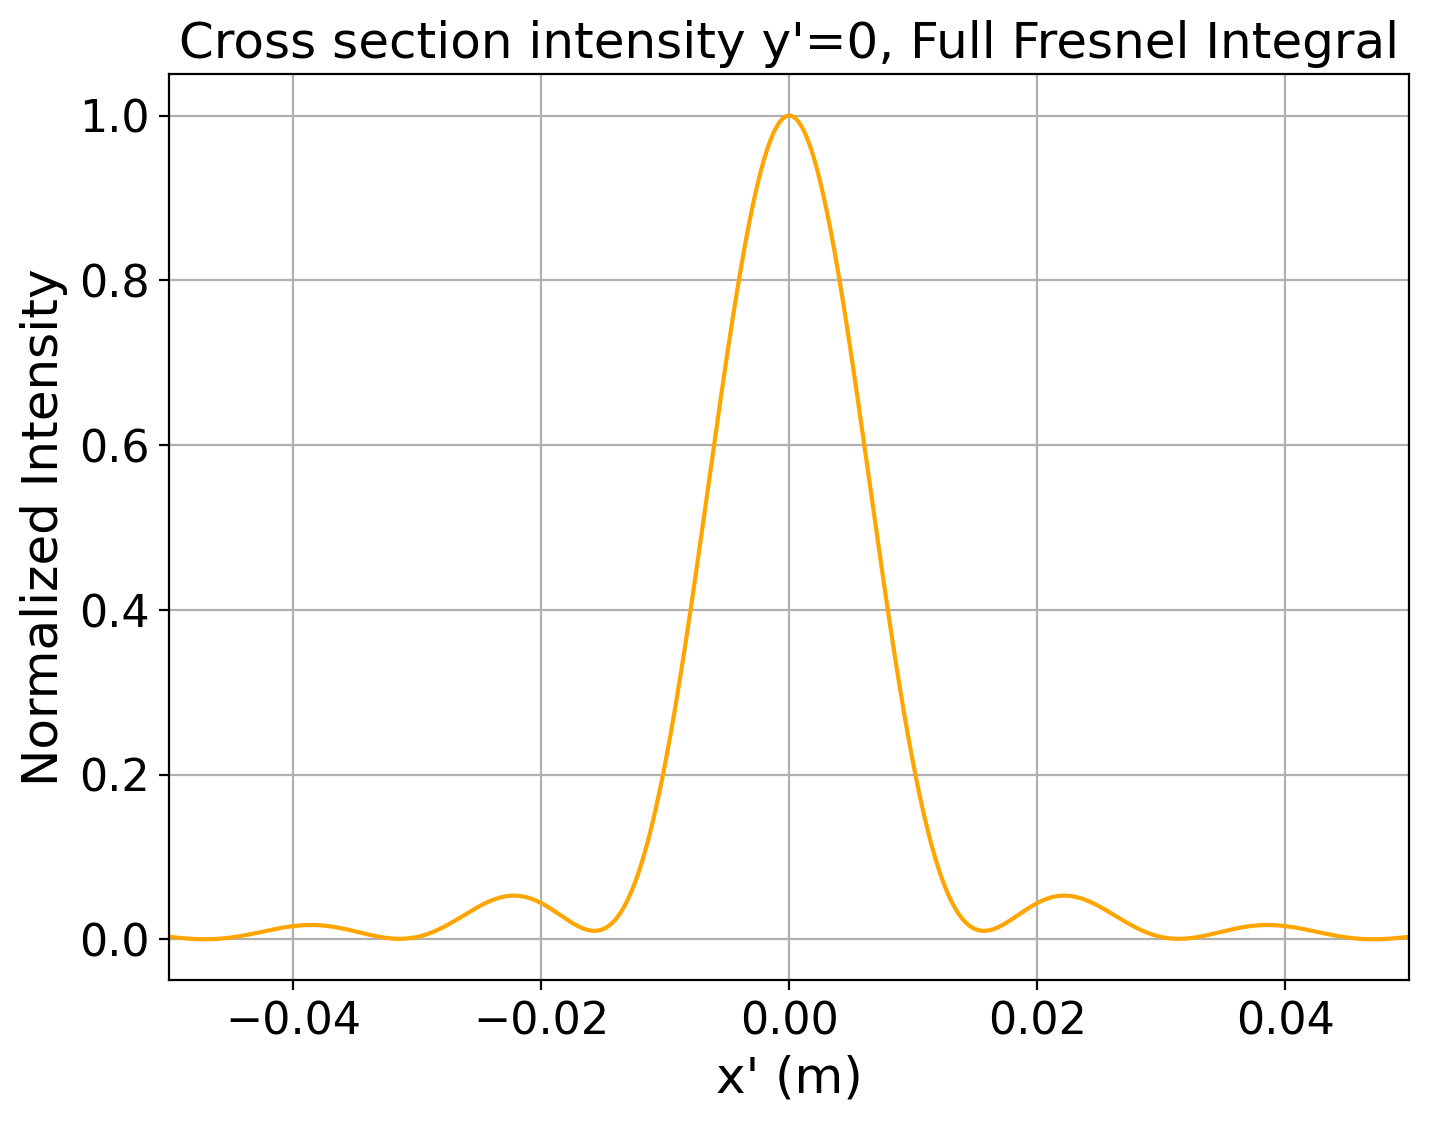

In [18]:
# Part c

fresnel_x = special.erfi((50+50j)*(2*x+0.01)) - special.erfi((50+50j)*(2*x-0.01))
intensity_x = np.absolute(fresnel_x)**2

plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, intensity_x/np.amax(intensity_x), color='orange')
plt.grid()
plt.xlim(-0.05,0.05)
plt.title('Cross section intensity y\'=0, Full Fresnel Integral', fontsize=18)
plt.xlabel('x\' (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.savefig('hw2_q1d_xCS.png', dpi=200)

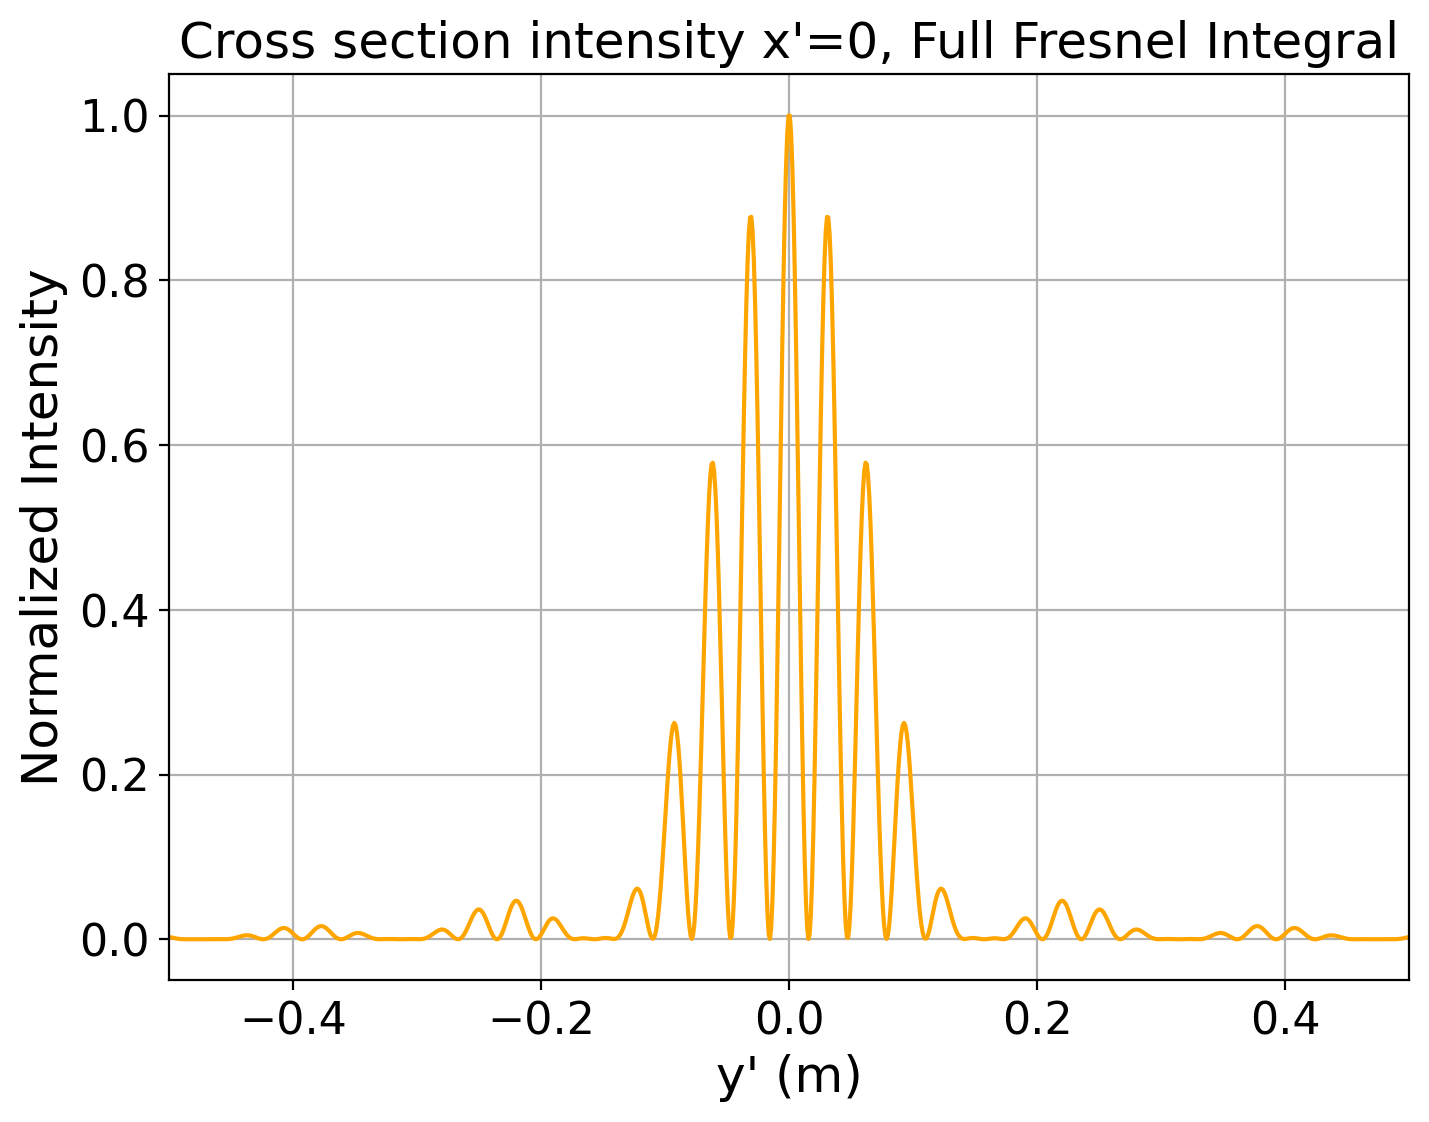

In [19]:
fresnel_y = special.erfi((50+50j)*(2*y-0.004)) \
           -special.erfi((50+50j)*(2*y-0.006)) \
           +special.erfi((50+50j)*(2*y+0.006)) \
           -special.erfi((50+50j)*(2*y+0.004)) \

intensity_y = np.absolute(fresnel_y)**2

plt.figure(figsize=(8, 6), dpi=200)
plt.plot(y, intensity_y/np.amax(intensity_y), color='orange')
#plt.plot(y, I_y_sinc(y))
plt.grid()
plt.xlim(-0.5,0.5)
plt.title('Cross section intensity x\'=0, Full Fresnel Integral', fontsize=18)
plt.xlabel('y\' (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.savefig('hw2_q1d_yCS.png', dpi=200)

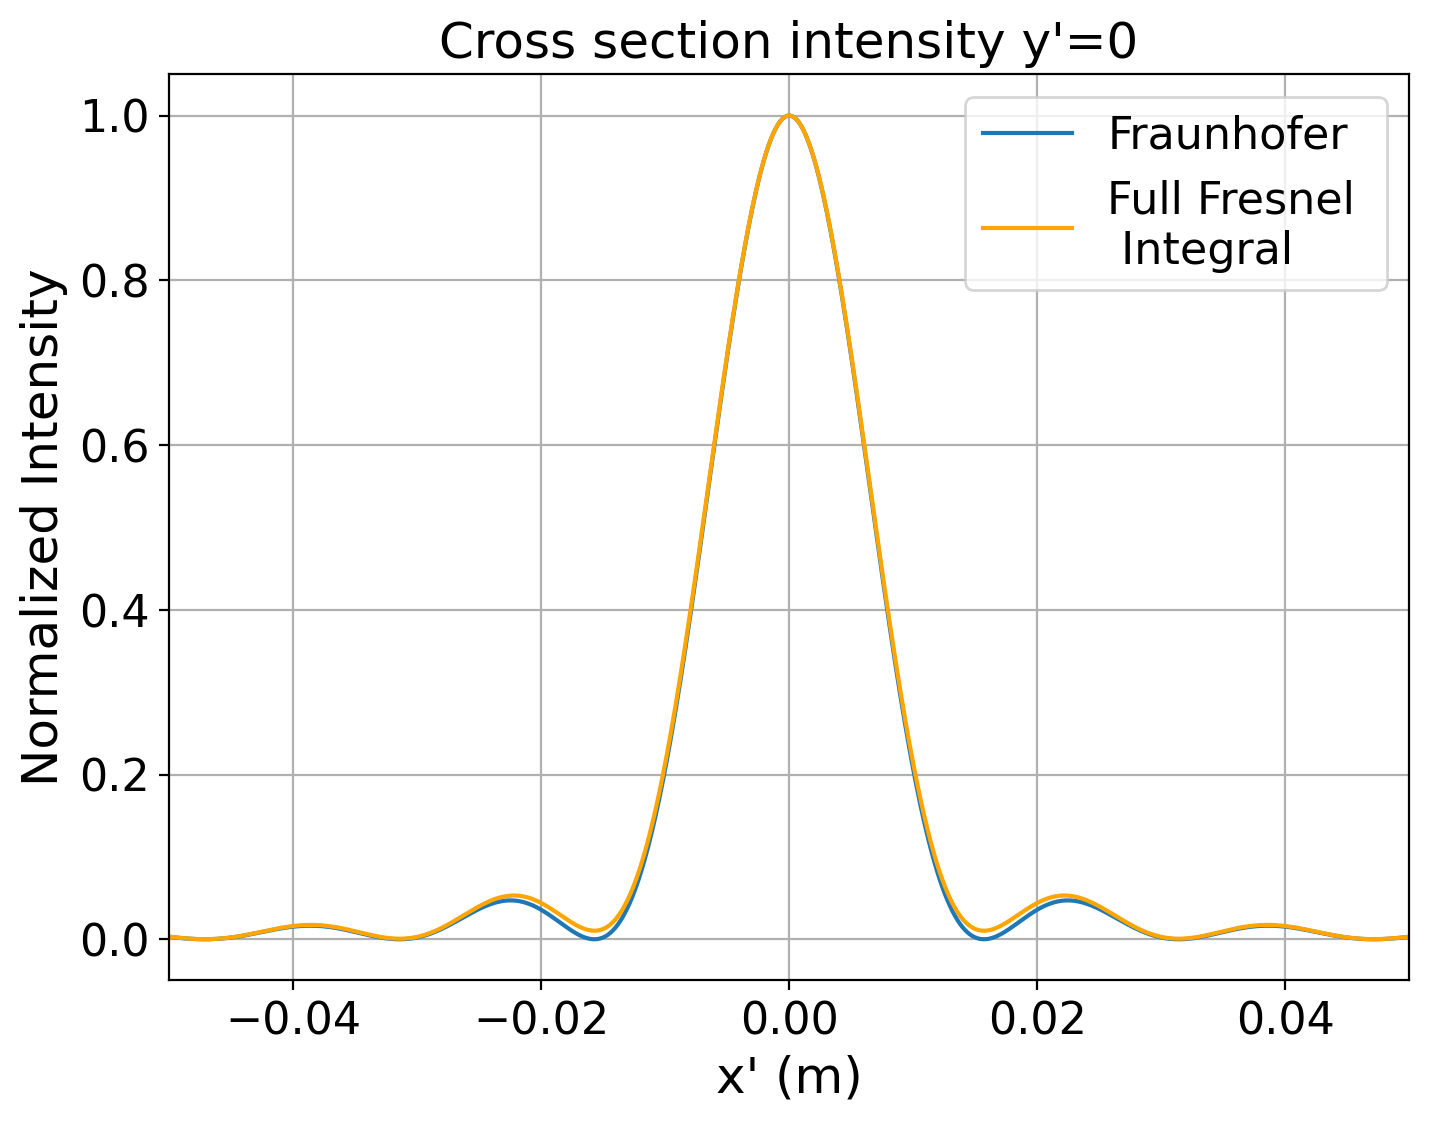

In [20]:
# Superimposed 

plt.figure(figsize=(8, 6), dpi=200)
plt.plot(x, I_x(x), label='Fraunhofer')
plt.plot(x, intensity_x/np.amax(intensity_x), color='orange', label='Full Fresnel \n Integral')
plt.legend(fontsize=16)
plt.grid()
plt.xlim(-0.05,0.05)
plt.title('Cross section intensity y\'=0', fontsize=18)
plt.xlabel('x\' (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.savefig('hw2_q1d_xCS_superimpose.png', dpi=200)

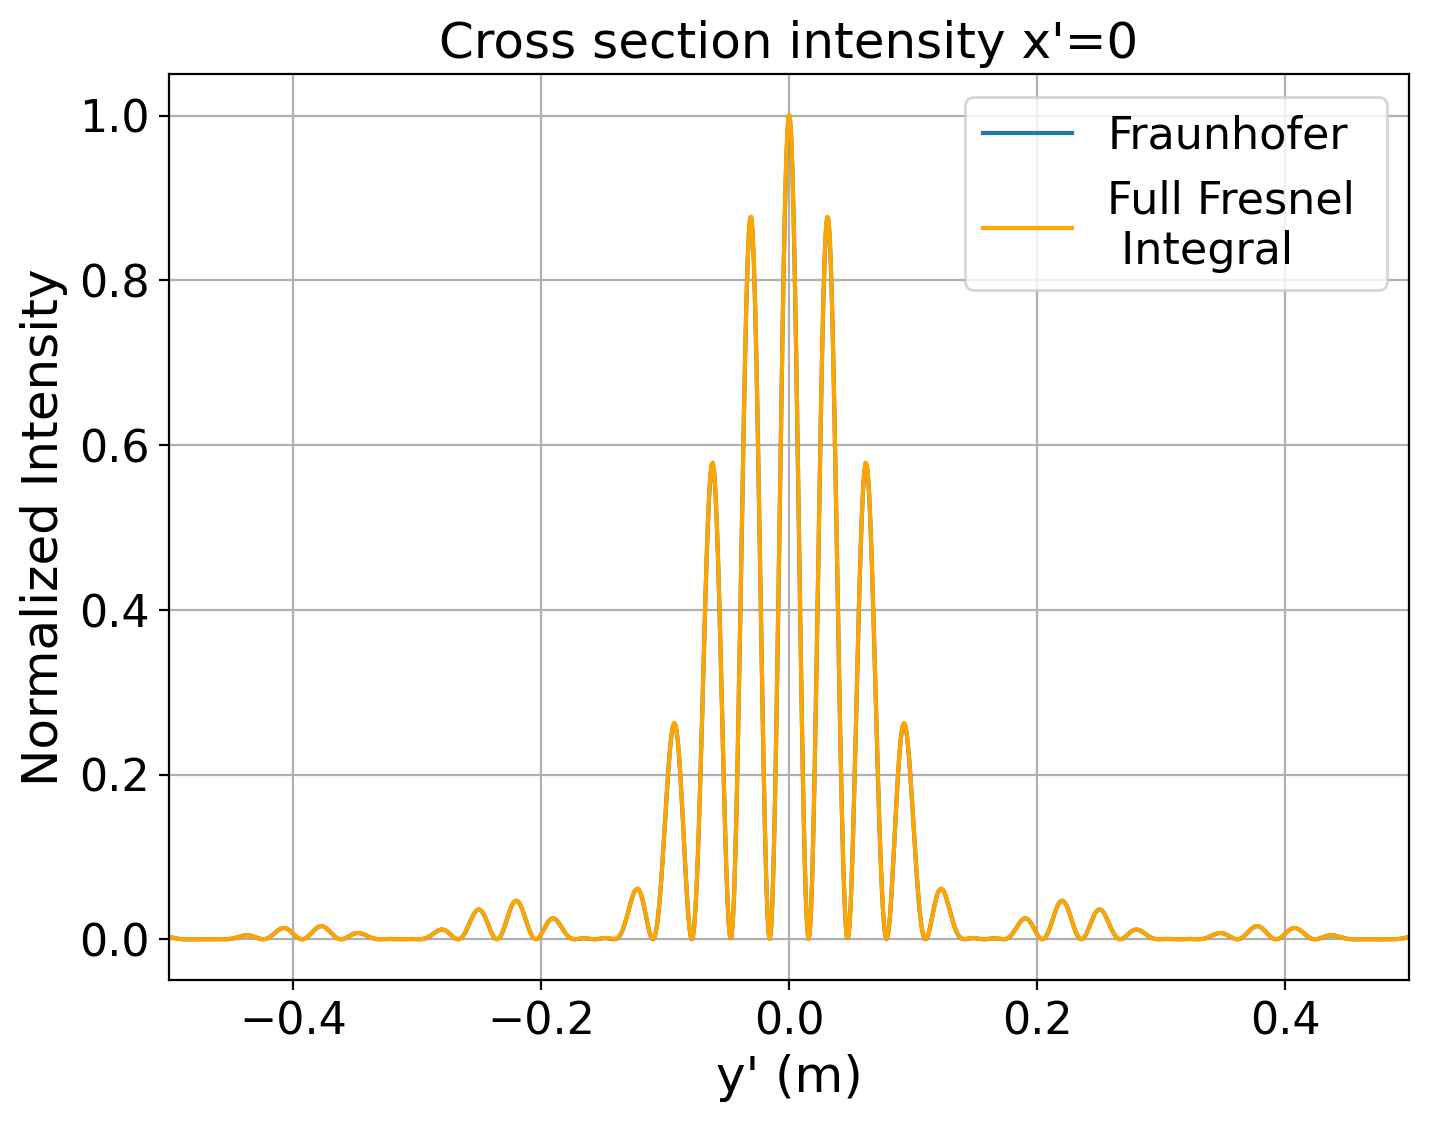

In [22]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(y, I_y_cos(y)*I_y_sinc(y), label='Fraunhofer')
plt.plot(y, intensity_y/np.amax(intensity_y), color='orange', label='Full Fresnel \n Integral')
plt.legend(fontsize=16)
#plt.plot(y, I_y_sinc(y))
plt.grid()
plt.xlim(-0.5,0.5)
plt.title('Cross section intensity x\'=0', fontsize=18)
plt.xlabel('y\' (m)', fontsize=18)
plt.ylabel('Normalized Intensity', fontsize=18)
plt.xticks(fontsize=16); plt.yticks(fontsize=16)
plt.savefig('hw2_q1d_yCS_superimpose.png', dpi=200)